In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation
from keras.utils.np_utils import to_categorical

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Using Theano backend.


In [2]:
data = pd.read_csv('/LeafData/train.csv')
parent_data = data.copy()
ID = data.pop('id')

In [3]:
y = data.pop('species')
y = LabelEncoder().fit(y).transform(y)
print y.shape

(990,)


In [4]:
X = StandardScaler().fit(data).transform(data)
print(X.shape)

(990, 192)


In [5]:
## We will be working with categorical crossentropy function
## It is required to further convert the labels into "one-hot" representation

y_cat = to_categorical(y)
print(y_cat.shape)

(990, 99)


In [6]:
## Developing a layered model for Neural Networks
## Input dimensions should be equal to the number of features
## We used softmax layer to predict a uniform probabilistic distribution of outcomes

model = Sequential()
model.add(Dense(1024,input_dim=192))
model.add(Dropout(0.2))
model.add(Activation('sigmoid'))
model.add(Dense(512))
model.add(Dropout(0.3))
model.add(Activation('sigmoid'))
model.add(Dense(99))
model.add(Activation('softmax'))


In [7]:
## Error is measured as categorical crossentropy or multiclass logloss
model.compile(loss='categorical_crossentropy',optimizer='rmsprop')

In [8]:
## Fitting the model on the whole training data
history = model.fit(X,y_cat,batch_size=128,nb_epoch=100,verbose=0)

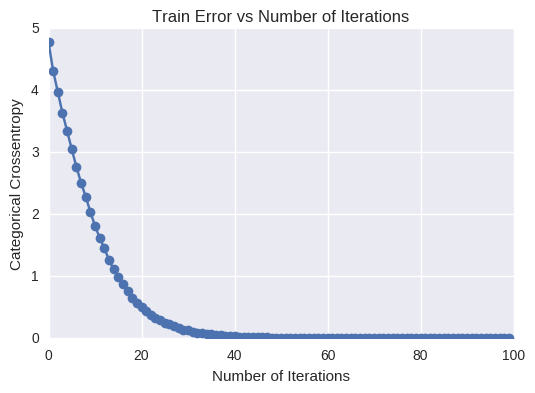

In [9]:
plt.plot(history.history['loss'],'o-')
plt.xlabel('Number of Iterations')
plt.ylabel('Categorical Crossentropy')
plt.title('Train Error vs Number of Iterations')

In [10]:
test = pd.read_csv('/LeafData/test.csv')
index = test.pop('id')
test = StandardScaler().fit(test).transform(test)

In [11]:
yPred = model.predict_proba(test)

594/594 [==============================] - 0s     


In [12]:
print yPred

[[  9.40259968e-14   5.29389028e-15   1.24256896e-17 ...,   6.53138875e-18
    2.08785642e-10   5.88624929e-19]
 [  3.68823490e-17   1.44360937e-13   3.28339699e-12 ...,   1.25183605e-11
    1.00826217e-15   1.32566050e-13]
 [  1.84178345e-12   9.99976993e-01   1.05871353e-11 ...,   7.78562642e-17
    6.08744537e-15   1.41754457e-08]
 ..., 
 [  1.42758624e-12   8.12864655e-14   6.80621127e-14 ...,   1.28737393e-13
    2.96849622e-13   7.20512400e-11]
 [  4.95697530e-15   1.51114134e-14   3.93619512e-11 ...,   6.16890870e-13
    1.19876569e-17   5.27325189e-15]
 [  1.91502834e-17   9.75081571e-10   1.79344237e-13 ...,   1.79477515e-15
    3.74250046e-16   7.65102445e-13]]


In [13]:
parent_data.species.unique().sort()
yPred = pd.DataFrame(yPred,index=index,columns=parent_data.species.unique())

In [14]:
from datetime import datetime
datename = datetime.now().strftime(format = '%d%m_%H%M')
folder = '/home/linux/Desktop/ML2'
filename = folder + '/' + 'LeafClassification_NN' + '.csv'

fp = open(filename,'w')
fp.write(yPred.to_csv())